ベイズ最適化入門  
https://github.com/Ma-sa-ue/practice/blob/master/machine%20learning(python)/bayeisan_optimization.ipynb  
The original code is based on python2. A few modifications to fit it to python3 are needed.

In [1]:
%matplotlib inline
%run functions.py
import sys
import matplotlib.pyplot as plt
np.random.seed(seed=123)

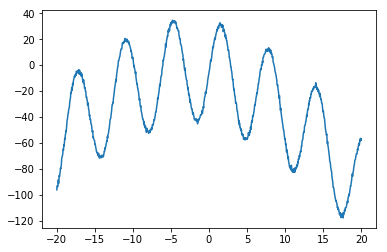

In [2]:
#Define data, supervised data
def target_func(x):
    return 40.0*np.sin(x/1.0) - (0.3*(x+6.0))**2 - (0.2*(x-4.0))**2 - 1.0*np.abs(x+2.0) + np.random.normal(0,1,1)
#
x = np.linspace(-20,20,1000)
z = list(map(target_func,x)) #for python3
z = np.array(z)
plt.plot(x, z) #### plot true data
plt.show()
def generate_sample(xval):
    zval = 0.0*xval
    for i in range(len(xval)):
        xid = np.argmin((x - xval[i])**2)
        zval[i] = z[xid]
    return zval

# The choice of the kernel:  RBF


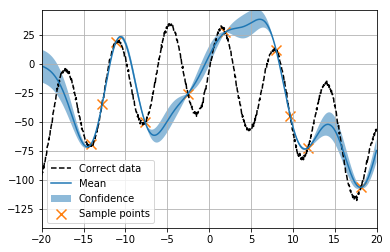

In [3]:
#Define GPR and Bayesian opt.
GPR = Gaussian_Process_Regression()
GPR.a2_1 = 10.0 #Width for the Gaussian function in GPR kernel
print('# The choice of the kernel: ', GPR.kernel_name1)
#
#Definition of array
Ndata = 10
x_sample = np.array([])
y_sample = np.array([])
x_point = np.random.uniform(-20,20,Ndata) #Initial point is randomely chosen
#
x_sample = np.append(x_sample,x_point)                          #Add x_point to x_sample
y_point = generate_sample(x_point)                              #Get y_point value from x_sample
y_sample = np.append(y_sample,y_point)                          #Add y_point to x_ample
#
mean, std = GPR.xsample2meanvariance(x_sample, y_sample, x, eps = 1.0e-10) #Get mean/std

plt.figure()
plt.xlim(-20,20)
plt.ylim(1.2*min(np.amin(z),np.amin(mean)),1.2*max(np.amax(z),np.amax(mean)))
plt.plot(x,z,'k--',label='Correct data')
plt.plot(x,np.array(mean), label='Mean')
high_bound = mean+ 1.0*std
lower_bound = mean- 1.0*std
plt.fill_between(x,high_bound,lower_bound, alpha=0.5, label='Confidence')
plt.scatter(x_sample,y_sample,marker='x',s=100,label='Sample points')
plt.grid()
plt.legend()
plt.show()